# **Reconstrução de Sinais.**

Um sinal de tempo discreto pode ser convertido em um sinal de tempo contínuo mediante um sistema de conversão. Iremos ver dois tipos de reconstrução de sinais:

* Reconstrução Ideal de sinais.
* Reconstrução Real de sinais.

A reconstrução de um sinal exige amostras que, de forma coletiva, sejam capazes de identificar um único sinal. Se as condições do Teorema de Amostragem forem satisfeitas, dentre todos os sinais, apenas um possui a largura de faixa mínima de $B < \frac{1}{2T_a}$.

## **Reconstrução Ideal**

Na reconstrução ideal, o sinal contínuo é obtido por uma filtragem em frequência com uso de um filtro passa-baixo ideal.

(Imagem) 51/60

Note que, para:

* $x_r(t)$ o valor reconstruido no tempo.
* $x_s(t)$ o valor amostrado.
* $x_c(t)$ o valor contínio. (que não foi amostrado ainda)
* $T_a$ o período de amostragem.

temos a seguinte situação:

$$ \begin{align*}x_r(t) &= x_s(t) * h(t) \\ \, &= \frac{1}{T_a}\sum_{n=-\infty}^{\infty}x_c(nT_a)\delta(t - n T_a) * h(t) \\ \, &= \frac{1}{T_a} \sum_{n=-\infty}^{\infty}x_c(nT_a)h(t - n T_a) \end{align*}$$

Como a resposta ao impulso do Filtro Passa baixa ideal é dada por:

$$ \begin{align*} h(t) &= T_a \cdot sinc \left(\frac{\omega_s}{2}t \right) \\ \, &= T_a \cdot sinc \left(\frac{\pi}{T_a}t \right)\end{align*}$$

então:

$$ \boxed{\begin{align*}x_r(t) &= \sum_{n=-\infty}^{\infty}x_c(nT_a) sinc \left(\frac{\pi}{T_a}t - n T_a\right) \end{align*}}$$

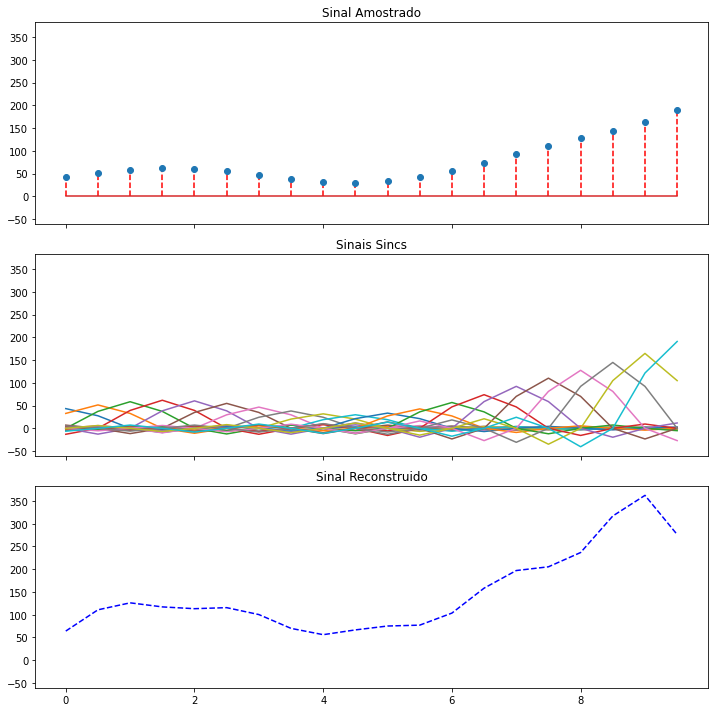

In [39]:
# Exemplo de Reconstrução
import numpy as np
import matplotlib.pyplot as plt

# Função Amostrada
Ta = 0.5                                             # Periodo amostragem
t_0 = 0                                              # Tempo Inicial
t_f = 10                                             # Tempo Final 
n = (t_f - t_0)/Ta                                   # Quantidade
t = np.arange(t_0, t_f, Ta)                          # Array Tempo
y = 20*np.sin(t) + 40 + 1.7**t - np.log(t + 0.1)     # Função Amostrada

# Constroi uma função que cria SINCS
def sinc(signal, n, t_a, time):
    return signal*np.sinc(time - n*t_a)

# Recria o sinal através das funções SINCS
sinal_reconst = sinc(y[0], 0, Ta, t)
for j in range(1, int(n)):
    sinal_reconst = np.add(sinal_reconst, sinc(y[j], j, Ta, t))

# Parte gráfica
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(10,10))

# Plota a Função Amostrada
axs[0].stem(t, y, 'r--')
axs[0].set_title('Sinal Amostrado')

# Plota as funcões SINCS de 0 à N
for i in range(0, int(n)):
    axs[1].plot(t, sinc(y[i], i, Ta, t))
axs[1].set_title('Sinais Sincs')

# Plota o Sinal Reconstruido
axs[2].plot(t, sinal_reconst, 'b--')
axs[2].set_title('Sinal Reconstruido')

plt.tight_layout()
plt.show()